In [54]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import proplot as plot
import concurrent.futures

data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')
transverse_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Case Setting

In [55]:
Pe=1e-3
pixelResolution=0.5e-6
DO2=6.20322E-06
w = 30e-6
U_0   = Pe*DO2/w
rhof =4.4890
rhoST= 1.2758
print(f"average inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"air flux at ST: {U_0*60*rhof/rhoST} m3/(m2 min) ")

print("---- air flux reference----")
print(f"reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  ")
print(f"recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)")
print(f"usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)")
print(f"Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [(450 m3(ST)/m3), cf rate: 0.15m/d] ")
print(f"relatively light oil min air flux (Moore, 1999): 0.0156 m3 (ST)/(m2.min) [(150 m3(ST)/m3), cf rate: 0.15m/d] ")

print("---- combustion front velocity----")
print("reference cf rate (Moore, 1999): 0.15 m/d=> 1.73 um/s => pass 680um need about 386s")



average inlet velocity: 0.00020677399999999998 m/s
air flux: 0.01240644 m3/(m2 min) 
air flux at ST: 0.043653009217745724 m3/(m2 min) 
---- air flux reference----
reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  
recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)
usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)
Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [(450 m3(ST)/m3), cf rate: 0.15m/d] 
relatively light oil min air flux (Moore, 1999): 0.0156 m3 (ST)/(m2.min) [(150 m3(ST)/m3), cf rate: 0.15m/d] 
---- combustion front velocity----
reference cf rate (Moore, 1999): 0.15 m/d=> 1.73 um/s => pass 680um need about 386s


### Comments
air flux is comparable to the reservoir conditions

## Min/Max fields

In [56]:
file_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T673_Pe1e-3_ExternalSurface/postProcessing/minMaxComponents2/32.51/fieldMinMax.dat"
Ufile_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T673_Pe1e-3_ExternalSurface/postProcessing/minMaxMagnitude/32.51/fieldMinMax.dat"
sampling_rate=1

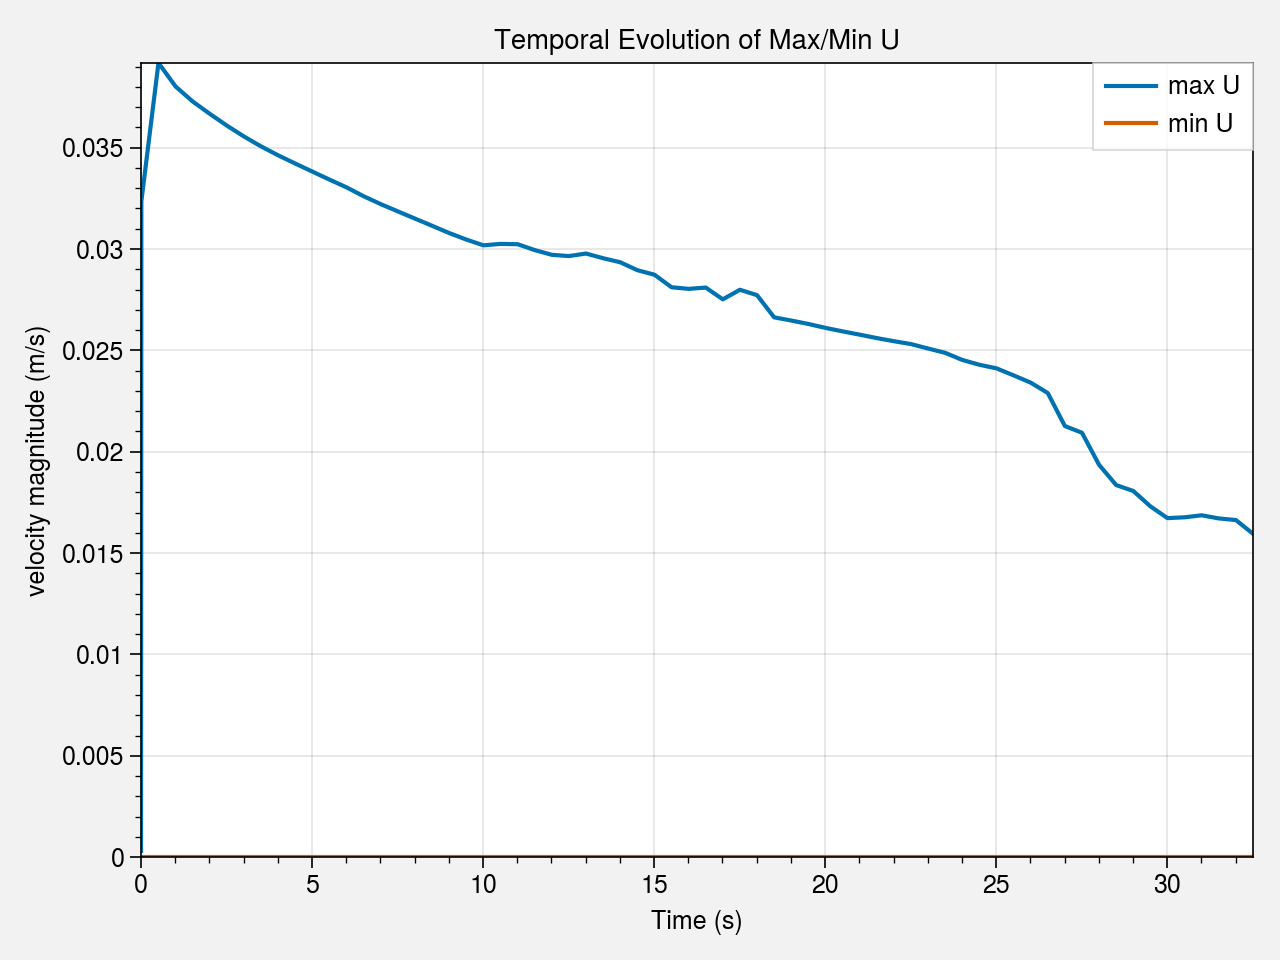

In [57]:
fig,ax,_=pyFigure.plot_min_max_field(Ufile_path,sampling_rate,"U","velocity magnitude (m/s)")

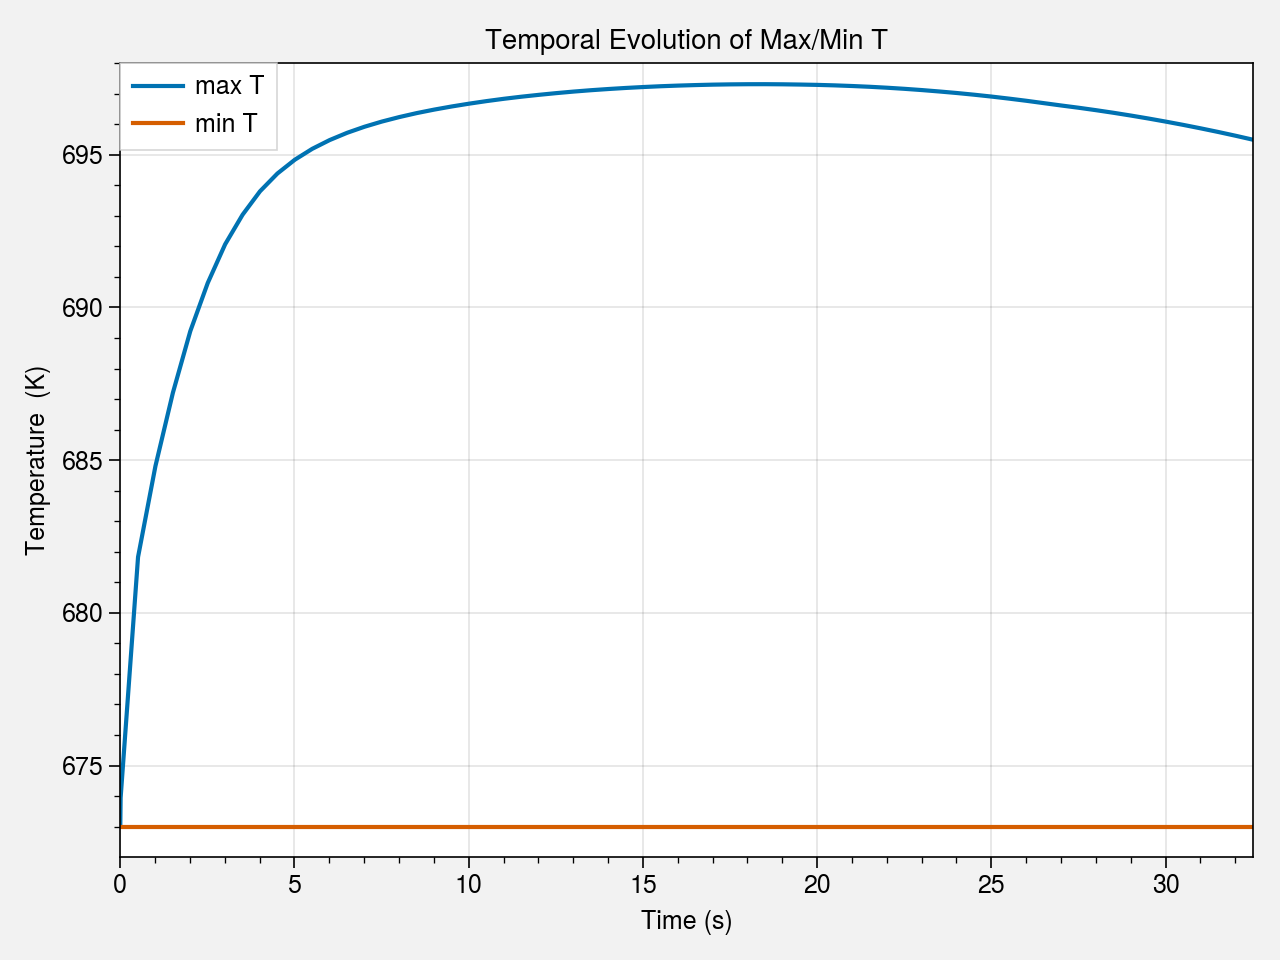

In [58]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"T","Temperature  (K)")
ax.set_ylim([672,ax.get_ylim()[1]*1.001])
fig.tight_layout()

(100000000.0, 20000000000.0)

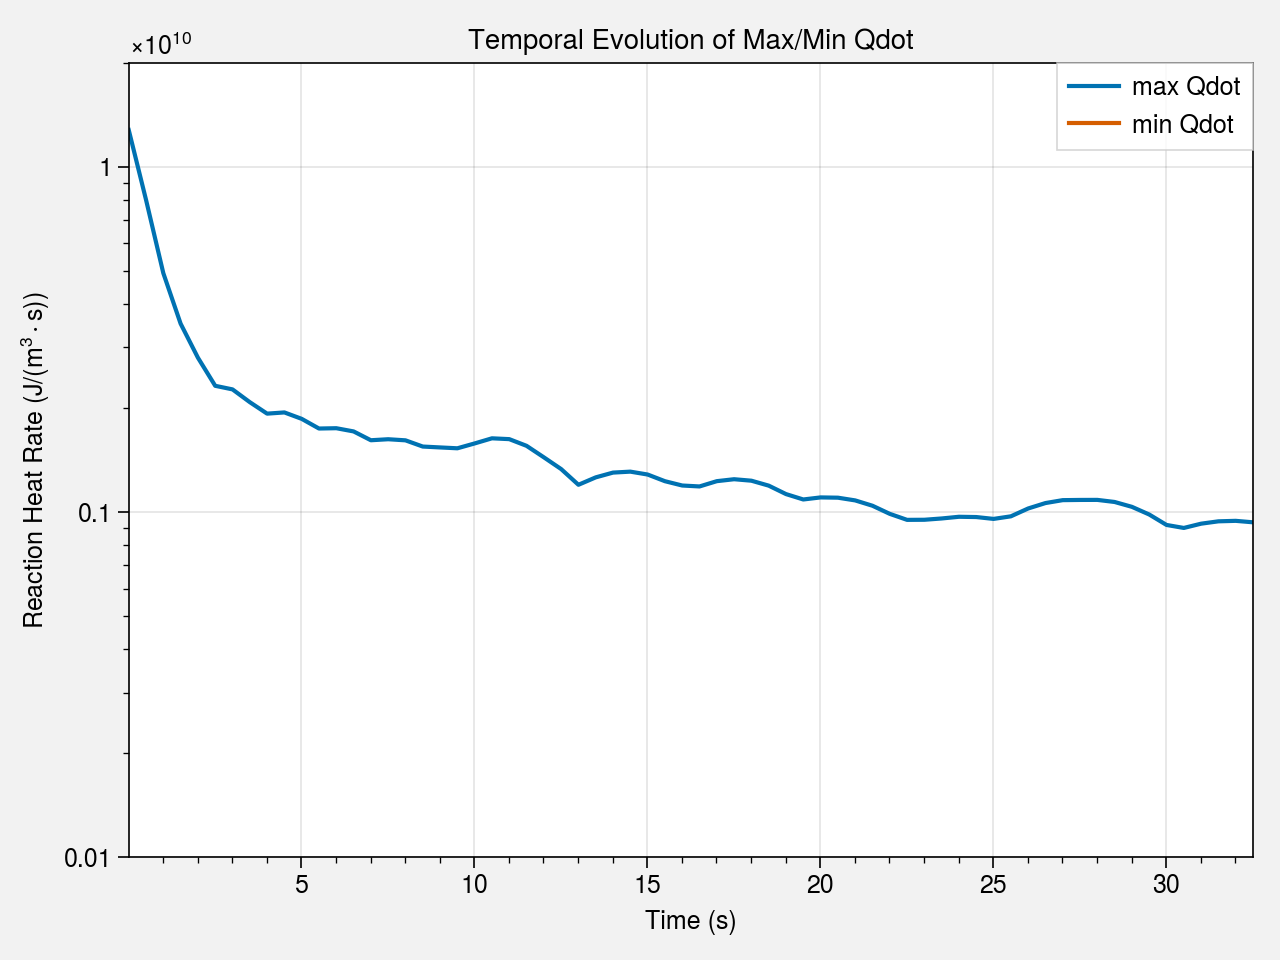

In [59]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"Qdot","Reaction Heat Rate (J/(m$^3\cdot$s))","log")
# ax.set_xlim([0.1,8.2])
ax.set_ylim([1e8,2e10])

## Trasversly averaged fields

In [60]:
# workerNum=8
# compute_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")
# pyCompute.batchComputeTransverselyAverages(data_folder,compute_data_folder)

# # script="/home/anoldfriend/OpenFOAM/anoldfriend-7/utilities/postProcess/pyCompute.py"
# # cmd = f"python {script} -d {data_folder} -s {compute_data_folder} -t all -n {workerNum} "
# # print(cmd)
# # os.system(cmd)

In [61]:
pyFigure.get_times_from_data_folder(transverse_data_folder)

array(['0.01', '0.51', '1.01', '1.51', '10.01', '10.51', '11.01', '11.51',
       '12.01', '12.51', '13.01', '13.51', '14.01', '14.51', '15.01',
       '15.51', '16.01', '16.51', '17.01', '17.51', '18.01', '18.51',
       '19.01', '19.51', '2.01', '2.51', '20.01', '20.51', '21.01',
       '21.51', '22.01', '22.51', '23.01', '23.51', '24.01', '24.51',
       '25.01', '25.51', '26.01', '26.51', '27.01', '27.51', '28.01',
       '28.51', '29.01', '29.51', '3.01', '3.51', '30.01', '30.51',
       '31.01', '31.51', '32.01', '32.51', '4.01', '4.51', '5.01', '5.51',
       '6.01', '6.51', '7.01', '7.51', '8.01', '8.51', '9.01', '9.51'],
      dtype='<U5')

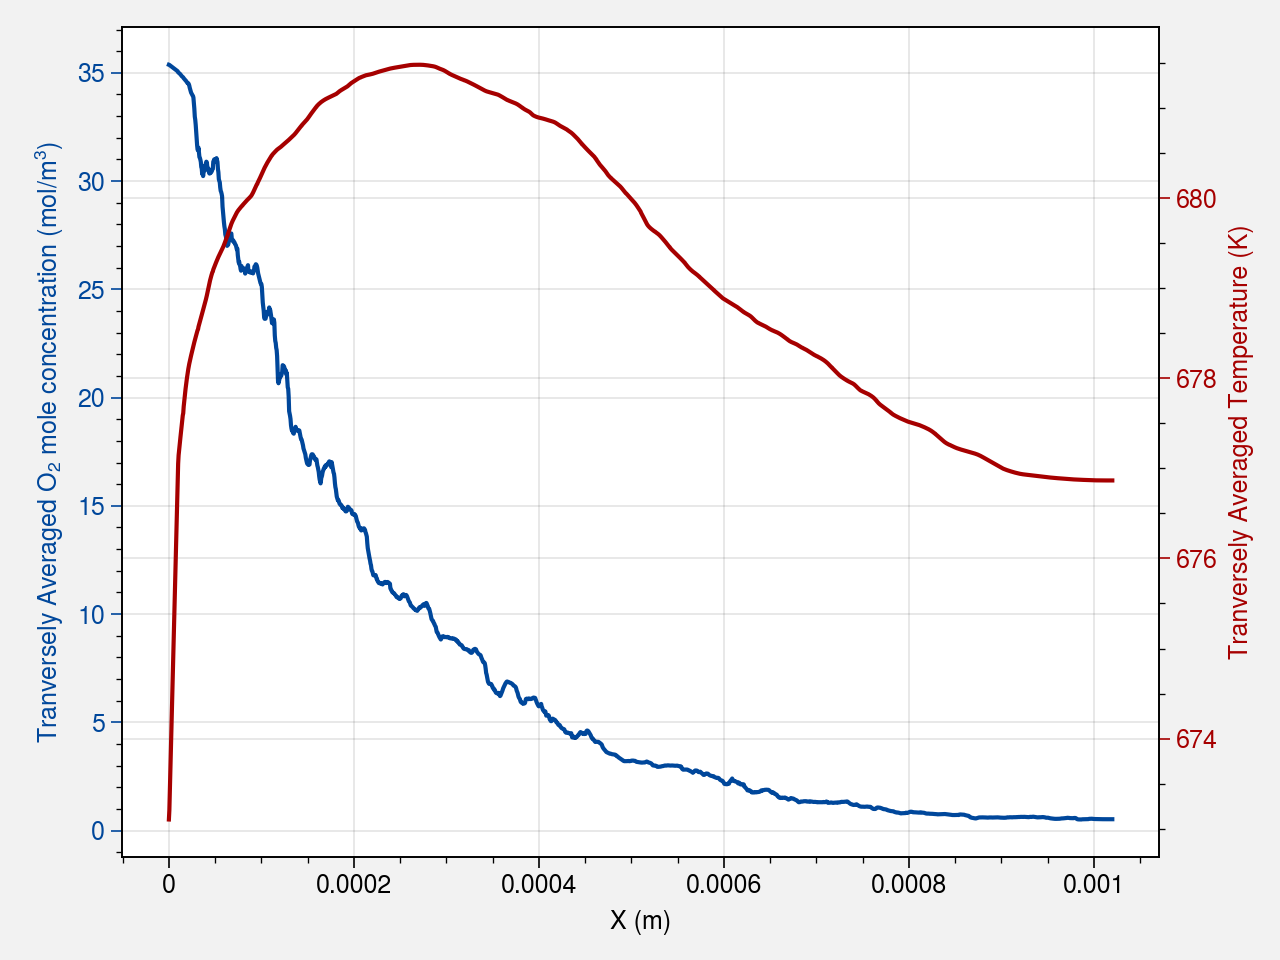

In [62]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.51")

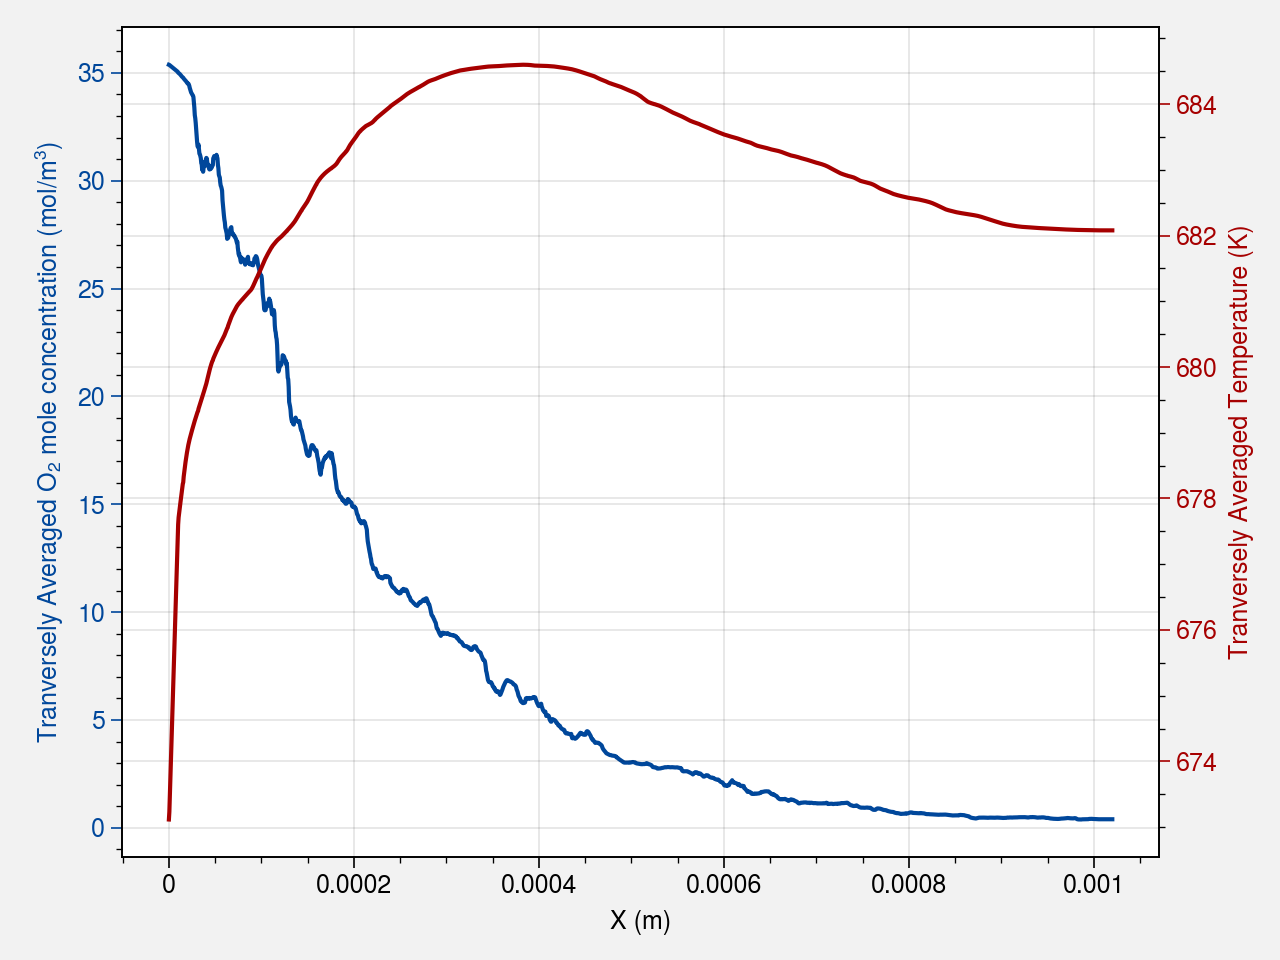

In [63]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"1.01")

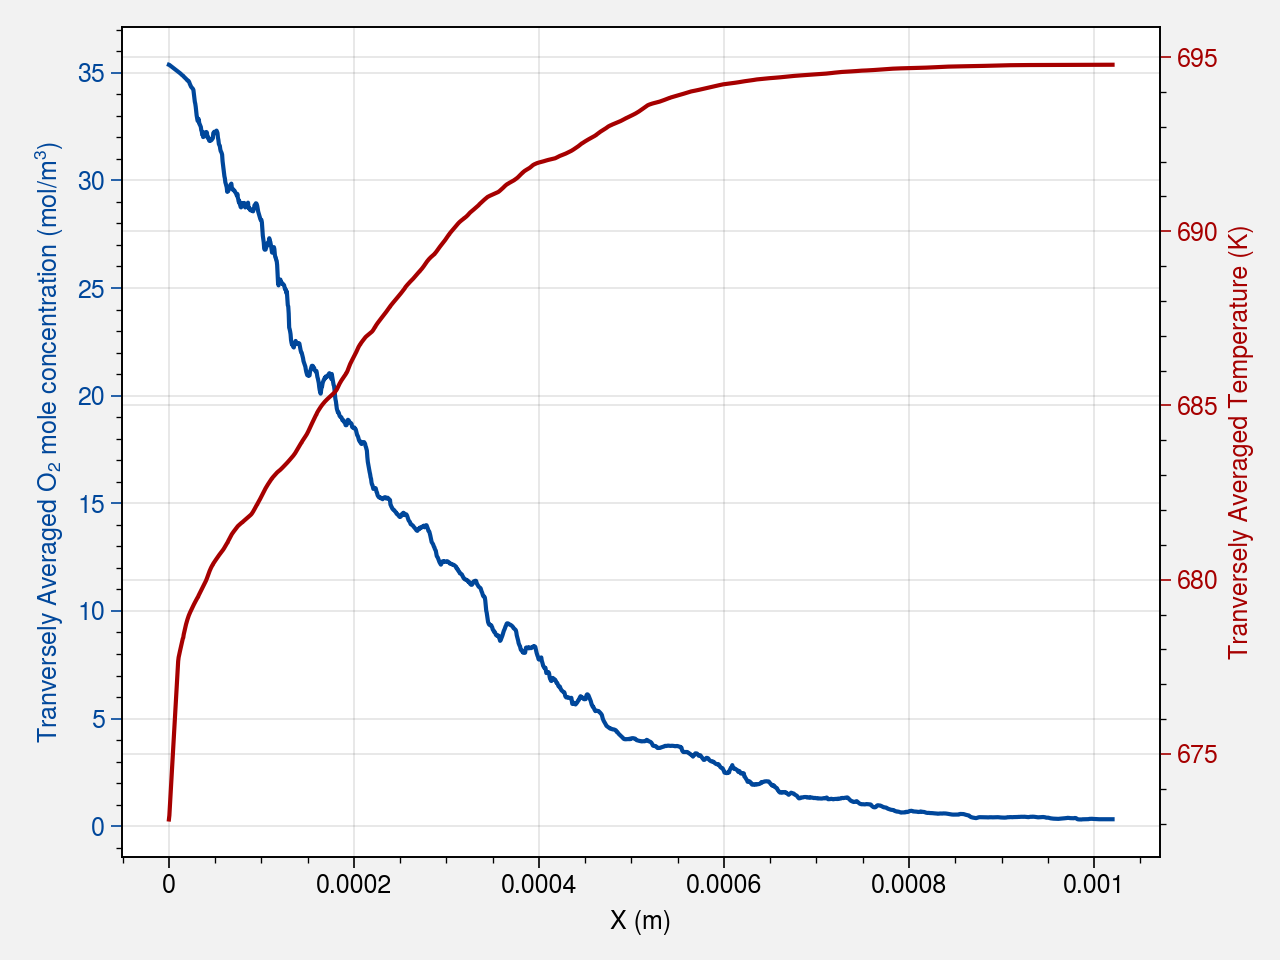

In [64]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"5.01")

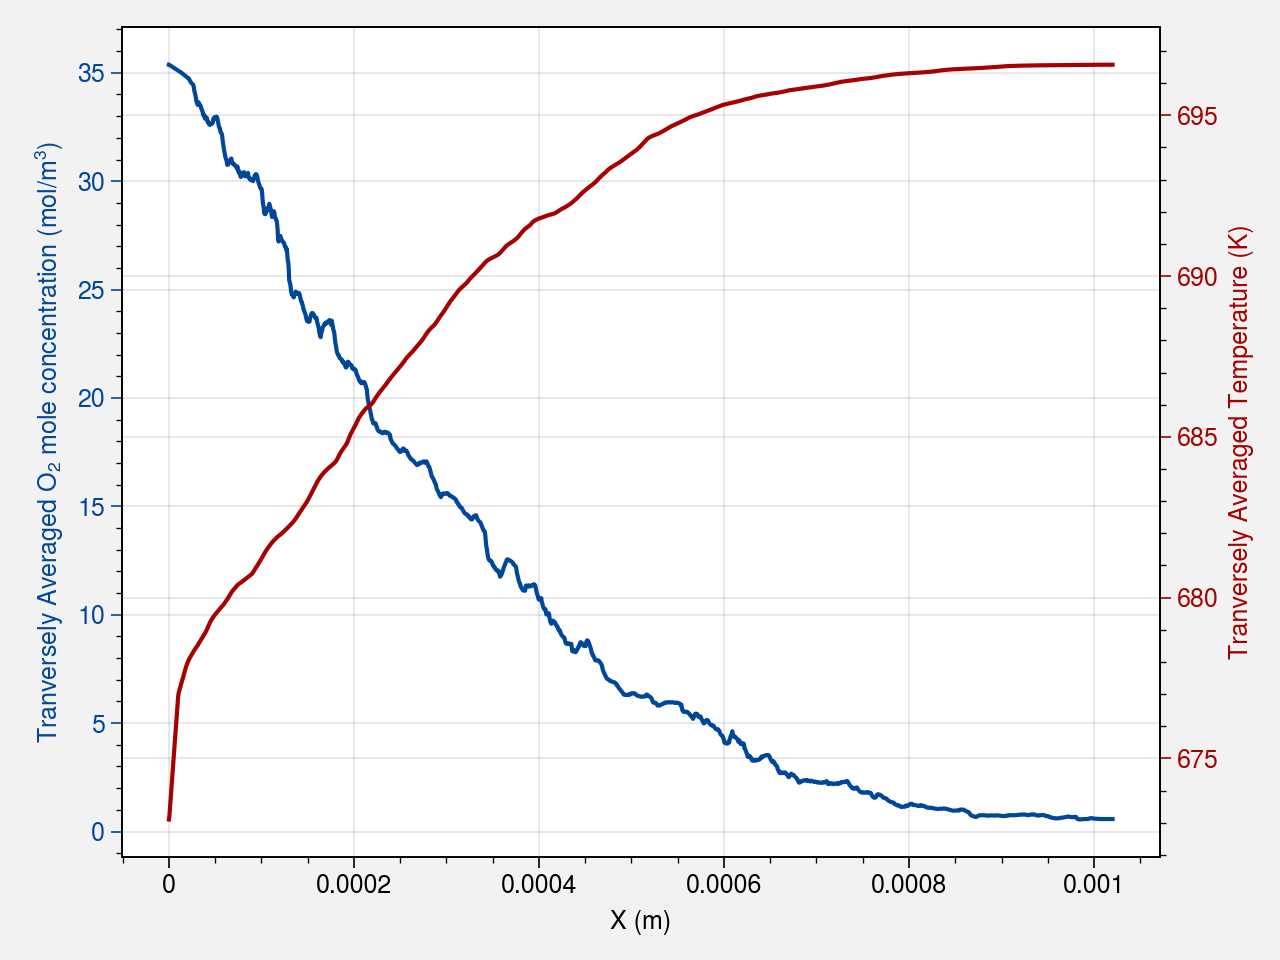

In [65]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"10.01")

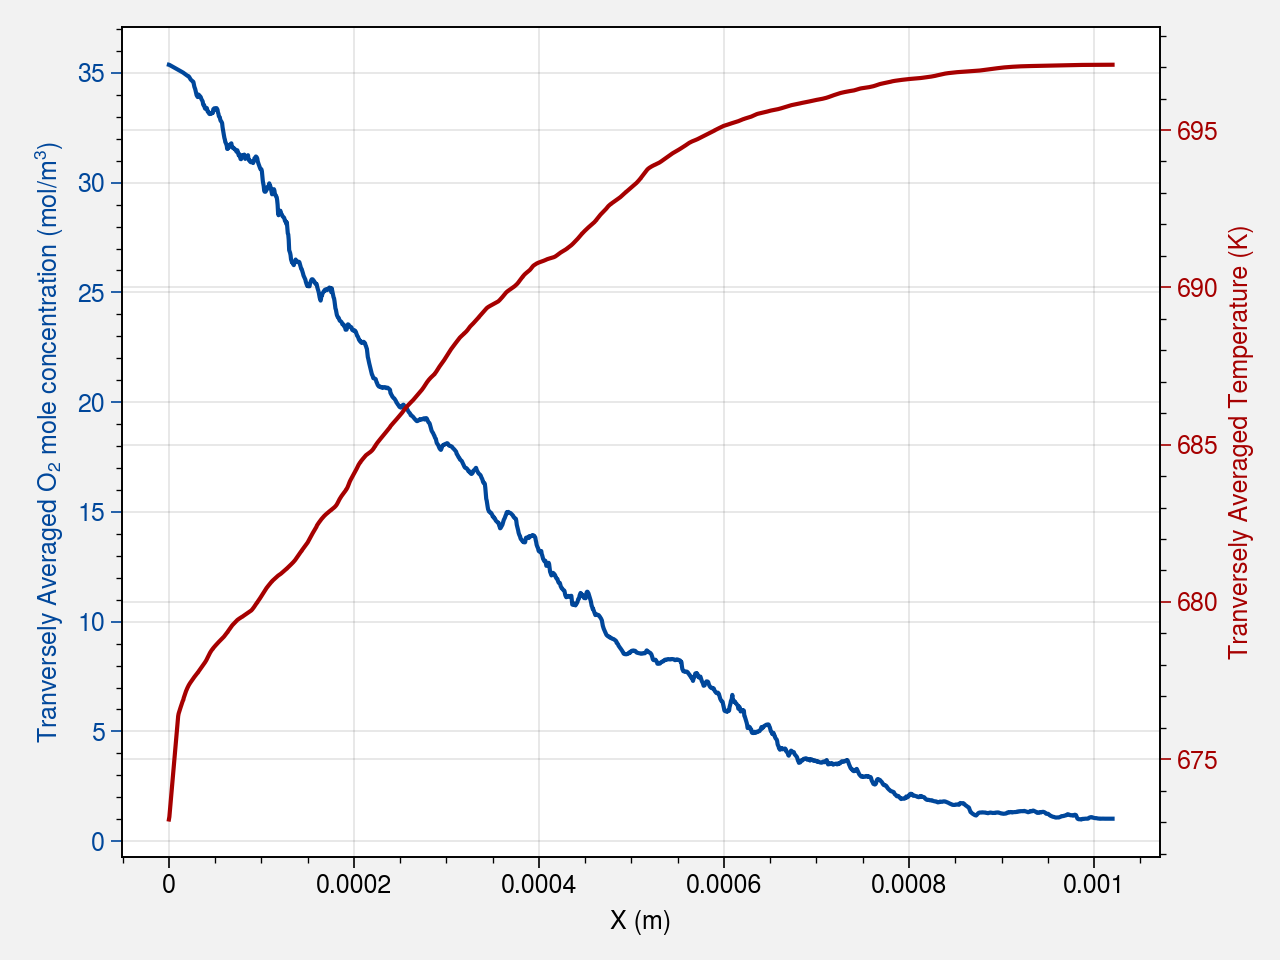

In [66]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"15.01")

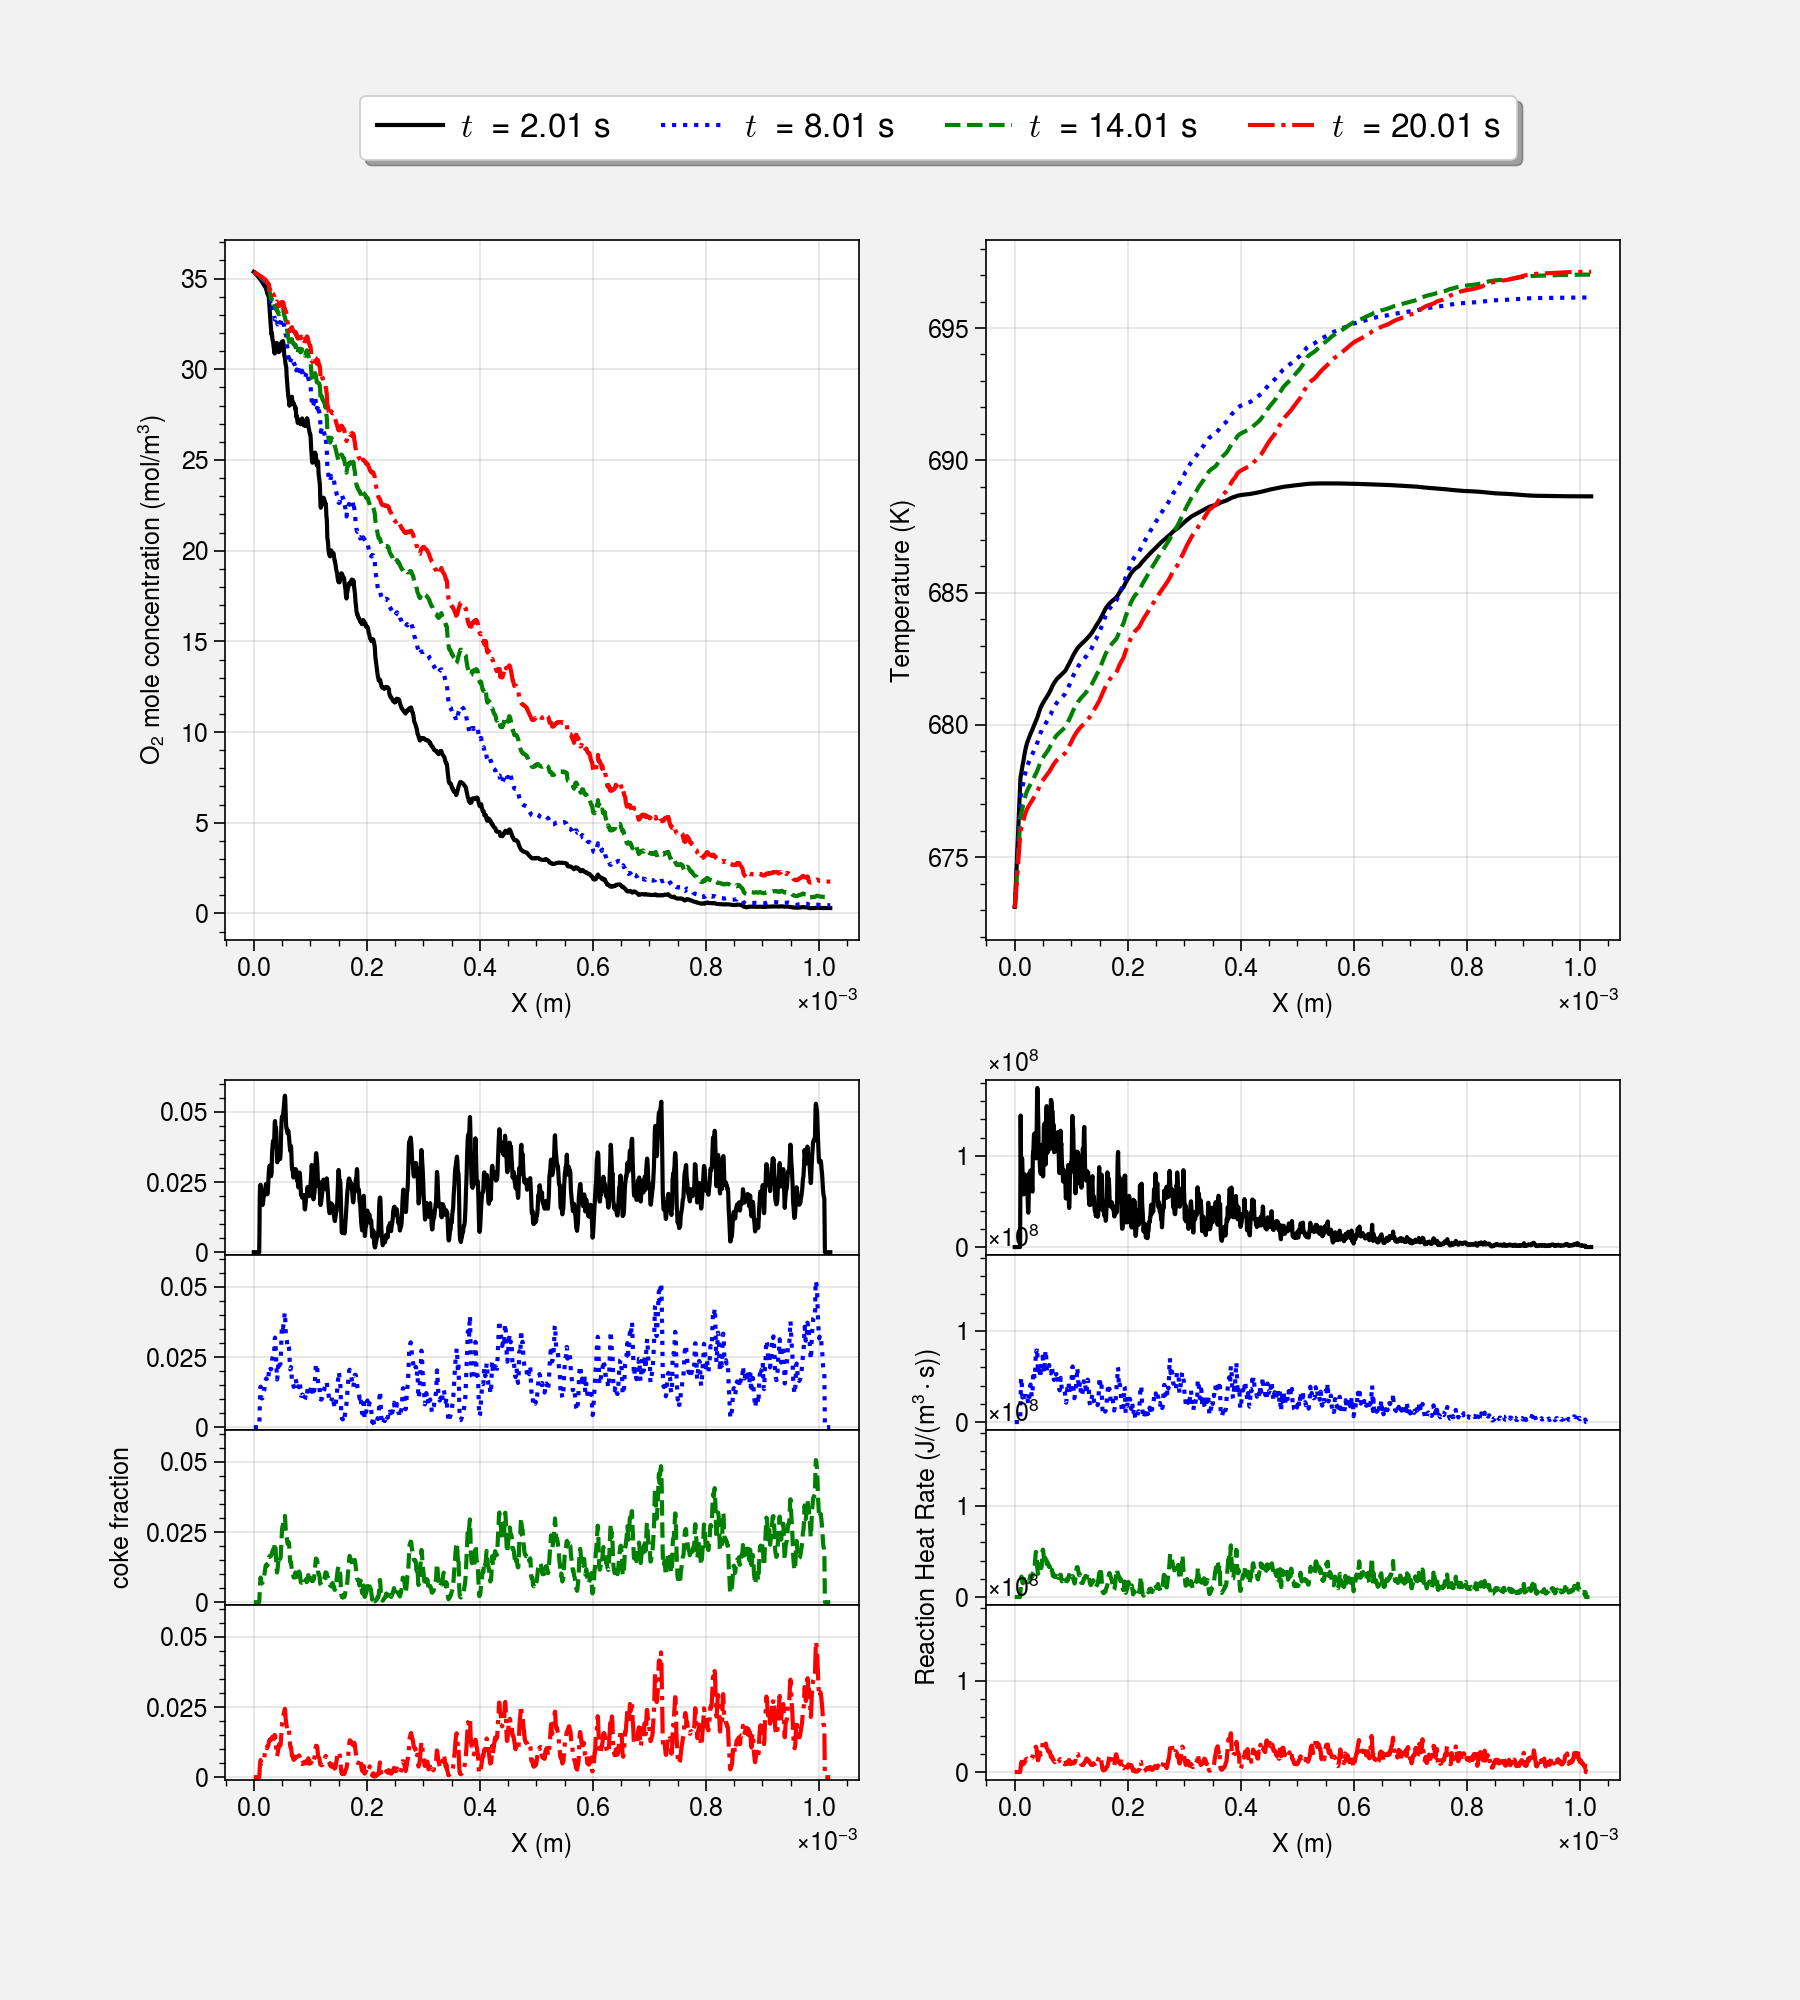

In [67]:
times=["2.01","8.01","14.01","20.01"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


### Comments
1. The coke reaction rate reduce with the external surface model, with the control regime changed from the diffusion-limited to the kinetics-limited mechanisms 
2. The combustion front expand a lot 

In [68]:
fig.savefig("transverselyAveragesOfMultipleTimeInstants.jpg",bbox_inches='tight')

## Show the reaction rate and burning rate

(-0.1, 3.5)

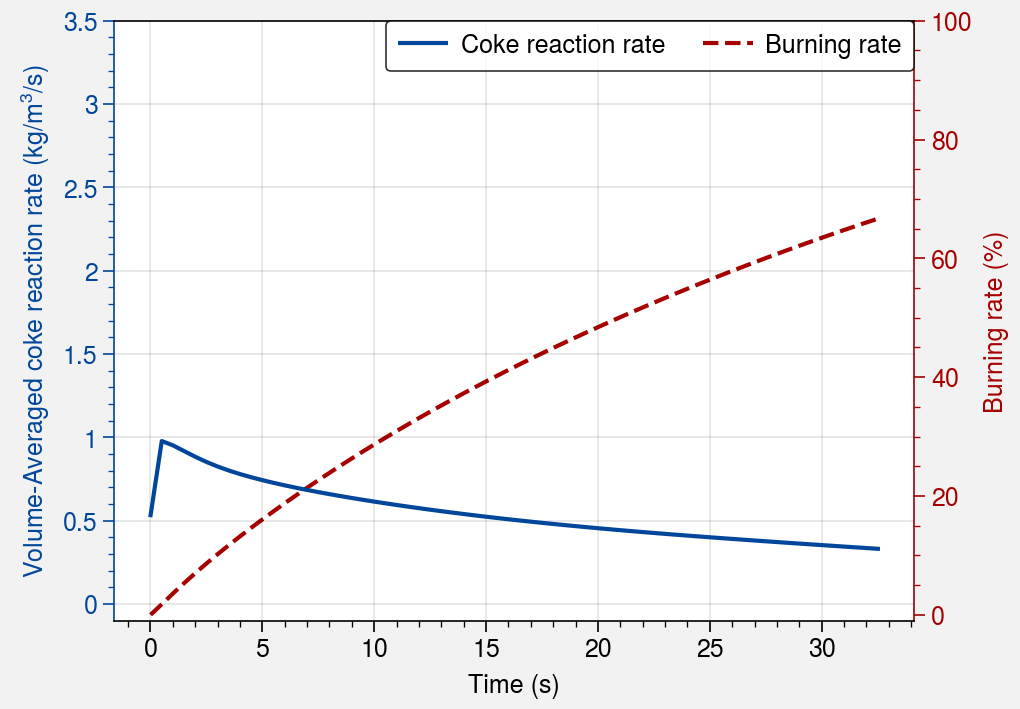

In [69]:
df_rate=pd.read_csv("../postProcess/others/ReactionRateAndBurningRate.csv")

ax1,ax2,fig=pyFigure.plot_reaction_rate_burning_rate(df_rate)
ax1.set_ylim([-0.1,3.5])

In [70]:
fig.savefig("ReactionRateAndBurningRate.jpg",bbox_inches='tight')

In [71]:

df_O2_flux_at_inlet=pd.read_csv("../postProcess/others/O2FluxsAtInlet.csv")

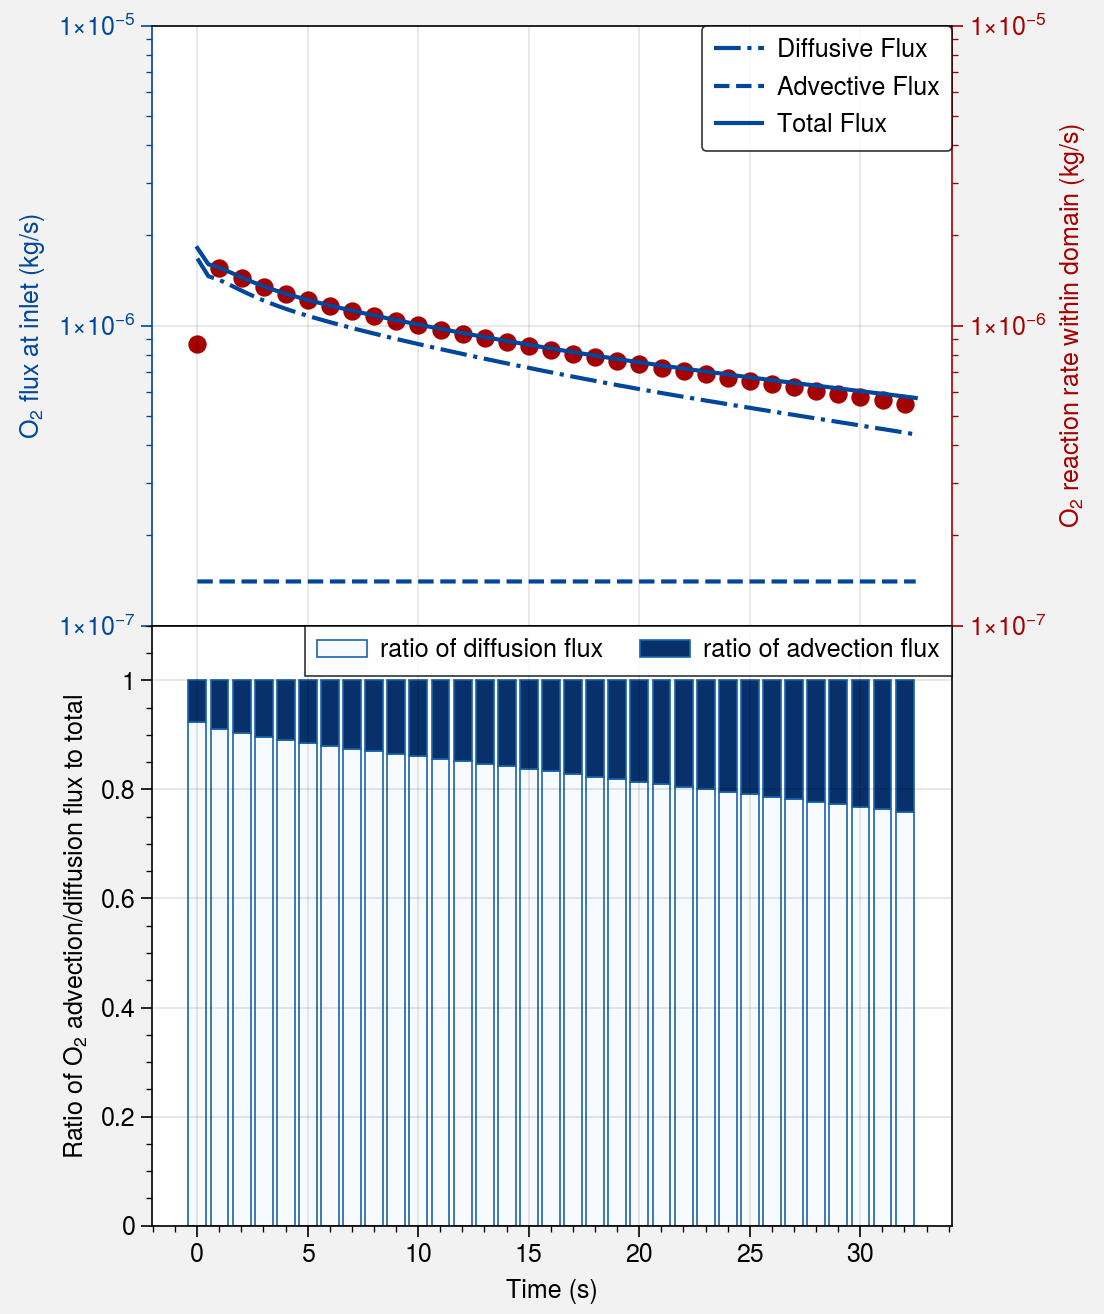

In [72]:
ax,ax2,fig=pyFigure.plot_O2_flux_reaction_rate(df_O2_flux_at_inlet,df_rate,pixelResolution,DO2,sampling_rate=2,ylim=(1e-7,1e-5))

### comments:
1. The processs is at the diffusion-dominated control regime. Therefore, the volume-averaged reaction rate is almost same as the initial temperature of 773K, just with slight difference due to the varied O2 diffusivity with the temperature

In [73]:
fig.savefig("O2Flux_ReactionRate.jpg",bbox_inches='tight')

## Show the max temperature and O2 concentration at the outlet

In [74]:
df_combined=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(file_path,transverse_data_folder)

(-2.0, 32.0)

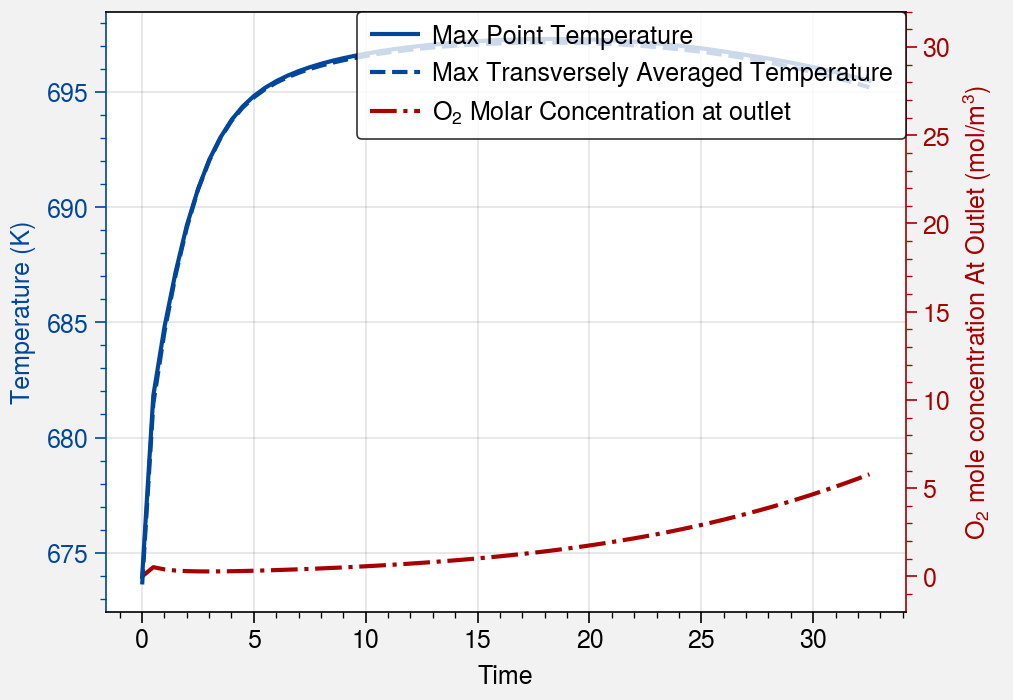

In [75]:
ax1,ax2,fig=pyFigure.Plot_MaxTemperature_OutletO2ConcHistory(df_combined)
ax2.set_ylim([-2,32])

In [76]:
fig.savefig("MaxTemperature_OutletO2ConcHistory.jpg",bbox_inches='tight')